<a href="https://colab.research.google.com/github/JuanDarquea/Think_Python_Practice/blob/main/Think_Python_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');
download('https://github.com/ramalho/jupyturtle/releases/download/2024-03/jupyturtle.py');

import thinkpython

Downloaded thinkpython.py
Downloaded diagram.py
Downloaded jupyturtle.py


# Chapter 5: Conditionals and Recursion
## Exercises


1.   Use integer division and the modulus operator to compute the number of days since January 1, 1970 and the current time of day in hours, minutes, and seconds.
2.   Write a function named is_triangle that takes three integers as arguments, and that prints either "Yes" or "No", depending on whether you can or cannot form a triangle from sticks with the given lengths. Hint: Use a chained conditional.
3.  What is the output of the program written? Draw a stack diagram that shows the state of the program when it prints the result.
4.  Read the function and see if you can figure out what it does. Then run it and see if you got it right. Adjust the values of length, angle and factor and see what effect they have on the result. If you are not sure you understand how it works, try asking a virtual assistant.
5.  Ask a virtual assistant "What is the Koch curve?"

        To draw a Koch curve with length x, all you have to do is
        Turn left 60 degrees.
        Draw a Koch curve with length x/3.
        Turn right 120 degrees.
        Draw a Koch curve with length x/3.
        Turn left 60 degrees.
        Draw a Koch curve with length x/3.

        The exception is if x is less than 5 -- in that case, you can just draw a straight line with length x.

        Write a function called koch that takes x as an argument and draws a Koch curve with the given length.

        Once you have koch working, you can use this loop to draw three Koch curves in the shape of a snowflake.
6.  As an example, ask a VA for a program that draws a Sierpiński triangle. The code you get should be a good starting place, but you might have to do some debugging. If the first attempt doesn't work, you can tell the VA what happened and ask for help -- or you can debug it yourself.



In [1]:
# Exercise 1
from time import time

now = time()
print(f"Seconds since Unix epoch(january 1, 1970): {now}")

# Calculate the number of seconds in a day
seconds_in_day = 24 * 60 * 60

# Calculate the number of days since the epoch using integer division
days_since_epoch = int(now // seconds_in_day)
print(f"Days since epoch: {days_since_epoch}")

# Calculate the remaining seconds in the current day using the modulus operator
remaining_seconds = now % seconds_in_day

# Calculate hours from the remaining seconds using integer division
hours = int(remaining_seconds // (60 * 60))

# Calculate the remaining seconds after accounting for hours using the modulus operator
remaining_seconds %= (60 * 60)

# Calculate minutes from the remaining seconds using integer division
minutes = int(remaining_seconds // 60)

# Calculate the remaining seconds after accounting for minutes using the modulus operator
seconds = int(remaining_seconds % 60)

print(f"Current time: {hours:02d}:{minutes:02d}:{seconds:02d}")

Seconds since Unix epoch(january 1, 1970): 1754454975.981182
Days since epoch: 20306
Current time: 04:36:15


In [3]:
# Exercise 2
def is_triangle(a, b, c):
    """
    Checks if three lengths can form a triangle and prints 'Yes' or 'No'.

    Args:
        a: The length of the first side.
        b: The length of the second side.
        c: The length of the third side.
    """
    if a > b + c or b > a + c or c > a + b:
        print("No")
    else:
        print("Yes")
# Examples
print("Can a triangle with lengths 4, 5 and 6 be created?")
triangle1 = is_triangle(4, 5, 6) # should be Yes
print("Can a triangle with lengths 1, 2 and 3 be created?")
is_triangle(1, 2, 3)   # should be Yes
print("Can a triangle with lengths 6, 2 and 3 be created?")
is_triangle(6, 2, 3)   # should be No
print("Can a triangle with lengths 1, 1 and 12 be created?")
is_triangle(1, 1, 12)   # should be No

Can a triangle with lengths 4, 5 and 6 be created?
Yes
Can a triangle with lengths 1, 2 and 3 be created?
Yes
Can a triangle with lengths 6, 2 and 3 be created?
No
Can a triangle with lengths 1, 1 and 12 be created?
No


6




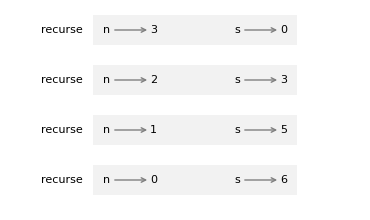

In [5]:
# Exercise 3
def recurse(n, s):
    if n == 0:
        print(s)
    else:
        recurse(n-1, n+s)

recurse(3, 0)
print()
print()
# Stack program
from diagram import make_frame, Stack
from diagram import diagram, adjust

# Build the stack frames (from initial call to base case)
frames = []
# The call sequence is recurse(3, 0) -> recurse(2, 3) -> recurse(1, 5) -> recurse(0, 6)
call_args = [
    {'n': 3, 's': 0},
    {'n': 2, 's': 3},
    {'n': 1, 's': 5},
    {'n': 0, 's': 6}  # Base case, prints 6
]

for args in call_args:
    frame = make_frame(args, name='recurse', dx=1.3, loc='left')  # dx for horizontal offset (optional)
    frames.append(frame)

stack = Stack(frames, dy=-0.5)  # Negative dy stacks downward

width, height, x, y = [3.5, 2, 1, 1.8]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

In [6]:
# exercise 4
"""Example function code"""
from jupyturtle import forward, left, right, back, make_turtle

def draw(length):
    angle = 50
    factor = 0.6

    if length > 5:
        forward(length)
        left(angle)
        draw(factor * length)
        right(2 * angle)
        draw(factor * length)
        left(angle)
        back(length)
"""Result"""
make_turtle(delay = 0.1)
draw(30)

In [8]:
# Exercise 5
from jupyturtle import forward, left, right, back, make_turtle
def koch(x):
  if x < 5:
    forward(x)
  else:
    koch(x/3)
    left(60)
    koch(x/3)
    right(120)
    koch(x/3)
    left(60)
    koch(x/3)
# Result 1
make_turtle(delay=0)
koch(120)
# Snowflake
make_turtle(delay=0, height=300)
for i in range(3):
    koch(120)
    right(120)

In [9]:
# Exercise 6
from jupyturtle import forward, left, right, make_turtle
import math

def draw_sierpinski_alt(t, length, depth):
    """
    Draws a Sierpiński triangle using an alternative recursive method.

    Args:
        t: The turtle object.
        length: The side length of the current triangle.
        depth: The recursion depth.
    """
    if depth == 0:
        # Draw a filled triangle (optional, can just draw the outline)
        # For simplicity, let's draw the outline of the base case triangle
        for _ in range(3):
            t.forward(length)
            t.left(120)
    else:
        draw_sierpinski_alt(t, length / 2, depth - 1)
        t.forward(length / 2)
        draw_sierpinski_alt(t, length / 2, depth - 1)
        # Replace t.backward(length / 2) with turns and forward
        t.left(180)
        t.forward(length / 2)
        t.left(180)

        t.left(60)
        t.forward(length / 2)
        t.right(60)
        draw_sierpinski_alt(t, length / 2, depth - 1)
        t.left(60)
        # Replace t.backward(length / 2) with turns and forward
        t.left(180)
        t.forward(length / 2)
        t.left(180)

        t.right(60)


# Create a turtle instance
t = make_turtle(delay=0, height=400, width=400)

# Calculate starting position to center the triangle
initial_length = 300
triangle_height = initial_length * math.sqrt(3) / 2

# Move the turtle to the calculated starting position
# Move backward by half the base length and down by a fraction of the height
t.left(180)
t.forward(initial_length / 2)
t.left(90)
t.forward(triangle_height / 3) # Adjust this factor as needed for better vertical centering
t.right(90)
t.left(180) # Turn back to original orientation

# Draw the Sierpiński triangle
draw_sierpinski_alt(t, initial_length, 4) # Adjust length and depth as needed

make_turtle(delay=0, height=200)
draw_sierpinski_alt(100, 3)

TypeError: draw_sierpinski_alt() missing 1 required positional argument: 'depth'